<a href="https://colab.research.google.com/github/Ngapa/AI/blob/main/CNN_Emotional_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download jonathanoheix/face-expression-recognition-dataset
! unzip face-expression-recognition-dataset

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  in

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# import Deep learning library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
picture_size = 48
folder_path = "/content/images/images/"

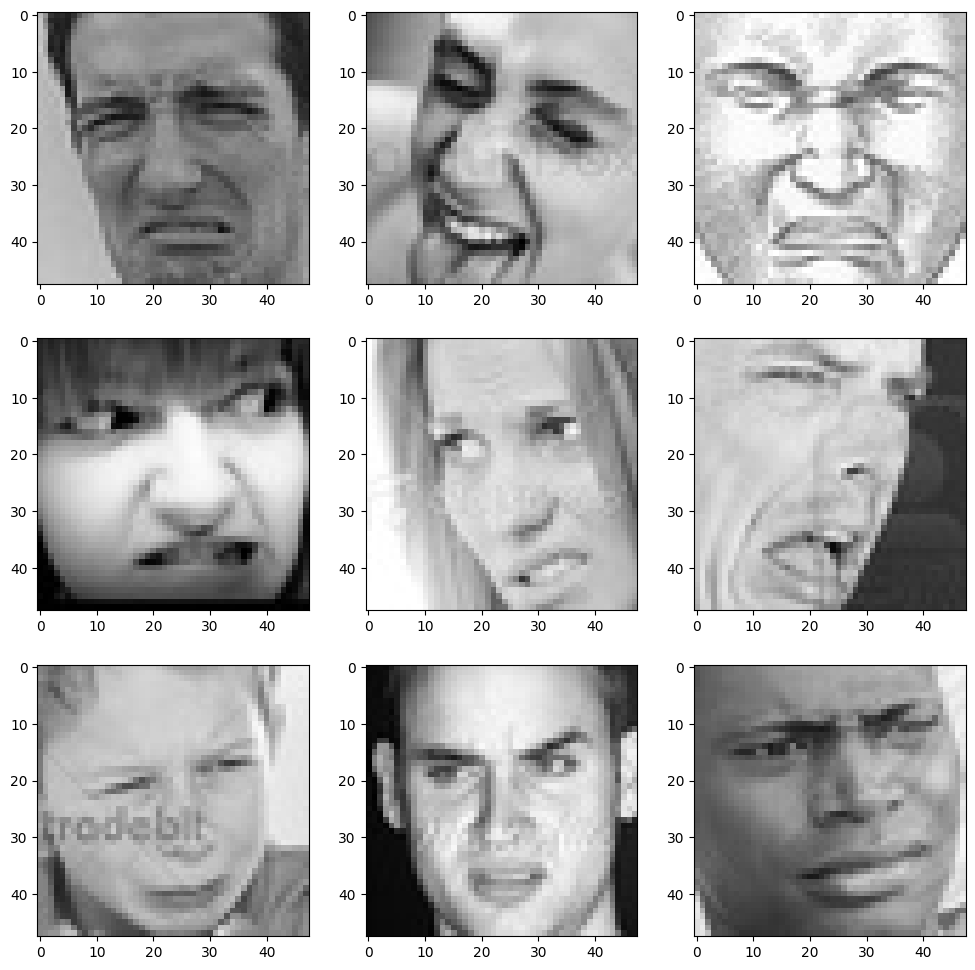

In [ ]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
no_of_classes = 7

model = Sequential([
    # Input layer
    Input(shape=(48, 48, 1)),

    # 1st CNN layer
    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # 2nd CNN layer
    Conv2D(128, (5, 5), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # 3rd CNN layer
    Conv2D(512, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # 4th CNN layer
    Conv2D(512, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),

    # Fully connected 1st layer
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),

    # Fully connected 2nd layer
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),

    # Output layer
    Dense(no_of_classes, activation='softmax')
])

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# ModelCheckpoint
checkpoint = ModelCheckpoint(
    "./model.keras",  # Changed from .h5 to .keras
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

# ReduceLROnPlateau
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 48

# Model compilation
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # Changed from 'lr' to 'learning_rate'
    metrics=['accuracy']
)

In [ ]:
# Impor yang mungkin diperlukan
import tensorflow as tf
from tensorflow import keras

# Pendekatan 1: Gunakan fit() tanpa argumen tambahan
history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set,
    callbacks=callbacks_list
)

# Jika pendekatan di atas masih menghasilkan peringatan, coba ini:
# Pendekatan 2: Gunakan fit() dengan pengaturan eksplisit untuk multiprocessing
# history = model.fit(
#     train_set,
#     steps_per_epoch=train_set.samples // train_set.batch_size,
#     epochs=epochs,
#     validation_data=test_set,
#     validation_steps=test_set.samples // test_set.batch_size,
#     callbacks=callbacks_list,
#     use_multiprocessing=False,
#     workers=1
# )

# Jika kedua pendekatan di atas masih menghasilkan peringatan, coba ini:
# Pendekatan 3: Konversi generator ke tf.data.Dataset
# def generator_to_dataset(generator, output_shapes):
#     def gen():
#         for x, y in generator:
#             yield x, y
#
#     return tf.data.Dataset.from_generator(
#         gen,
#         output_types=(tf.float32, tf.float32),
#         output_shapes=output_shapes
#     )
#
# # Asumsikan bahwa train_set dan test_set adalah hasil dari ImageDataGenerator.flow_from_directory()
# train_dataset = generator_to_dataset(train_set, ([None, *train_set.image_shape], [None, train_set.num_classes]))
# test_dataset = generator_to_dataset(test_set, ([None, *test_set.image_shape], [None, test_set.num_classes]))
#
# train_dataset = train_dataset.batch(train_set.batch_size).prefetch(tf.data.AUTOTUNE)
# test_dataset = test_dataset.batch(test_set.batch_size).prefetch(tf.data.AUTOTUNE)
#
# history = model.fit(
#     train_dataset,
#     epochs=epochs,
#     validation_data=test_dataset,
#     callbacks=callbacks_list
# )

Epoch 1/48


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.2625 - loss: 1.9344
Epoch 1: val_accuracy improved from -inf to 0.40447, saving model to ./model.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 48s 109ms/step - accuracy: 0.2628 - loss: 1.9337 - val_accuracy: 0.4045 - val_loss: 1.5407 - learning_rate: 0.0010
Epoch 2/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4318 - loss: 1.4713
Epoch 2: val_accuracy did not improve from 0.40447
226/226 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.4318 - loss: 1.4711 - val_accuracy: 0.3447 - val_loss: 1.7523 - learning_rate: 0.0010
Epoch 3/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5106 - loss: 1.2749
Epoch 3: val_accuracy improved from 0.40447 to 0.53043, saving model to ./model.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.5106 - loss: 1.2749 - val_accuracy: 0.5304 - val_loss: 1.2341 - learning_rate: 0.0010
Epoch 4/48
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5445 - loss: 1.1890
Epoch 4: val_

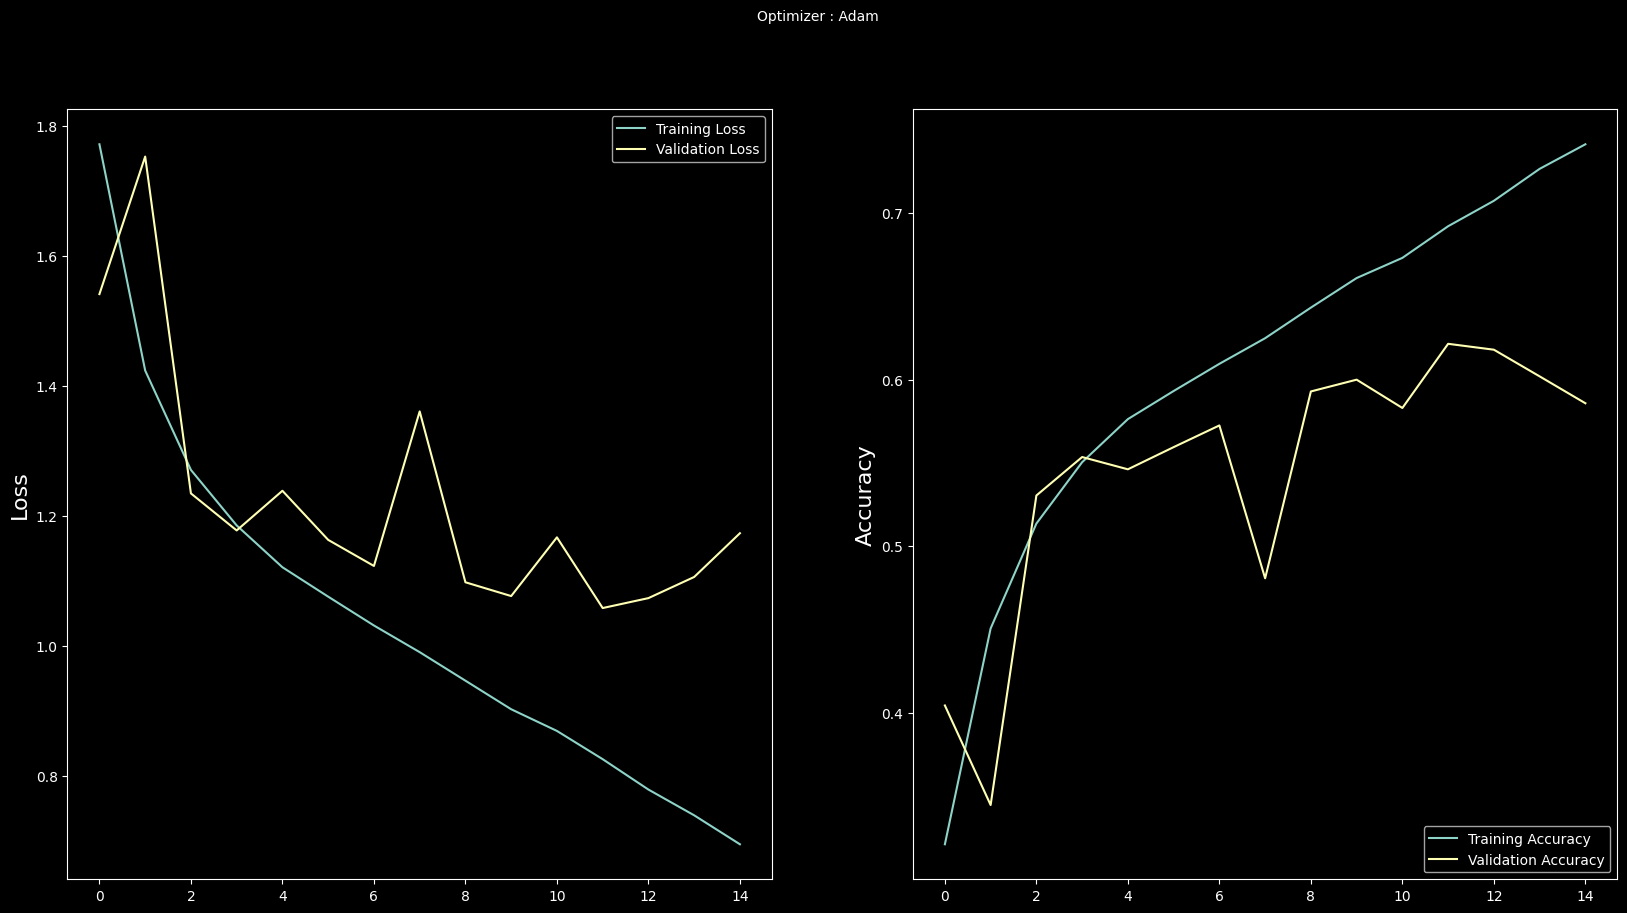

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()